# Demo: GeoPandas and CRS
UW Geospatial Data Analysis  
CEE467/CEWA567  
David Shean

## GeoPandas Background
* https://geopandas.org/en/stable/getting_started/introduction.html
* https://geopandas.org/data_structures.html

## Key modules and packages
Multiple levels of open-source  
* GeoPandas - high-level vector processing (most of what we'll do), with dependencies:
    * shapely (Python interface to `GEOS`) https://shapely.readthedocs.io/en/latest/manual.html
        * GEOS https://libgeos.org/
        * Handles geometry, spatial operations
    * fiona (interface to GDAL/OGR) https://fiona.readthedocs.io/en/latest/README.html
        * GDAL/OGR https://gdal.org/
        * File input and output
    * pyproj (interface to PROJ)
        * PROJ https://proj.org/
        * Cartographic projections and coordinate transformations library
    * numpy
    * pandas

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Load csv as Pandas DataFrame

In [2]:
glas_fn = '../01_Shell_Github/data/GLAH14_tllz_conus_lulcfilt_demfilt.csv'

In [3]:
glas_df = pd.read_csv(glas_fn)

In [4]:
type(glas_df)

pandas.core.frame.DataFrame

In [5]:
glas_df.head()

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc
0,2003.139571,731266.943345,44.157897,-105.356562,1398.51,1400.52,0.33,31
1,2003.139571,731266.943346,44.150175,-105.358116,1387.11,1384.64,0.43,31
2,2003.139571,731266.943347,44.148632,-105.358427,1392.83,1383.49,0.28,31
3,2003.139571,731266.943347,44.147087,-105.358738,1384.24,1382.85,0.84,31
4,2003.139571,731266.943347,44.145542,-105.359048,1369.21,1380.24,1.73,31


## Convert to GeoDataFrame

In [6]:
#gpd.GeoDataFrame?

In [7]:
gpd.GeoDataFrame(glas_df)

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc
0,2003.139571,731266.943345,44.157897,-105.356562,1398.51,1400.52,0.33,31
1,2003.139571,731266.943346,44.150175,-105.358116,1387.11,1384.64,0.43,31
2,2003.139571,731266.943347,44.148632,-105.358427,1392.83,1383.49,0.28,31
3,2003.139571,731266.943347,44.147087,-105.358738,1384.24,1382.85,0.84,31
4,2003.139571,731266.943347,44.145542,-105.359048,1369.21,1380.24,1.73,31
...,...,...,...,...,...,...,...,...
65231,2009.775995,733691.238340,37.896222,-117.044399,1556.16,1556.43,0.00,31
65232,2009.775995,733691.238340,37.897769,-117.044675,1556.02,1556.43,0.00,31
65233,2009.775995,733691.238340,37.899319,-117.044952,1556.19,1556.44,0.00,31
65234,2009.775995,733691.238340,37.900869,-117.045230,1556.18,1556.44,0.00,31


### Looks the same, let's add geometry column!

In [8]:
#gpd.points_from_xy?

In [9]:
mygeometry_array = gpd.points_from_xy(glas_df['lon'], glas_df['lat'])

In [10]:
mygeometry_array

<GeometryArray>
 ...
Length: 65236, dtype: geometry

## A quick look at Point objects 

In [11]:
type(mygeometry_array[0])

shapely.geometry.point.Point

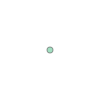

In [12]:
mygeometry_array[0]

In [13]:
p = mygeometry_array[0]

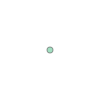

In [14]:
p

In [15]:
print(p)

POINT (-105.356562 44.157897)


In [16]:
p.x

-105.356562

In [17]:
p.y

44.157897

In [18]:
p.coords

In [19]:
#list(p.coords)
p.coords[:]

[(-105.356562, 44.157897)]

### Assign geometry column to GeoDataFrame

In [20]:
glas_gdf = gpd.GeoDataFrame(glas_df, geometry=mygeometry_array)

In [21]:
glas_gdf.head()

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc,geometry
0,2003.139571,731266.943345,44.157897,-105.356562,1398.51,1400.52,0.33,31,POINT (-105.35656 44.15790)
1,2003.139571,731266.943346,44.150175,-105.358116,1387.11,1384.64,0.43,31,POINT (-105.35812 44.15017)
2,2003.139571,731266.943347,44.148632,-105.358427,1392.83,1383.49,0.28,31,POINT (-105.35843 44.14863)
3,2003.139571,731266.943347,44.147087,-105.358738,1384.24,1382.85,0.84,31,POINT (-105.35874 44.14709)
4,2003.139571,731266.943347,44.145542,-105.359048,1369.21,1380.24,1.73,31,POINT (-105.35905 44.14554)


In [22]:
glas_gdf.iloc[0]

decyear                        2003.139571
ordinal                      731266.943345
lat                              44.157897
lon                            -105.356562
glas_z                             1398.51
dem_z                              1400.52
dem_z_std                             0.33
lulc                                    31
geometry     POINT (-105.356562 44.157897)
Name: 0, dtype: object

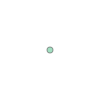

In [23]:
glas_gdf.iloc[0].geometry

In [24]:
type(glas_gdf['geometry'])

geopandas.geoseries.GeoSeries

In [25]:
type(glas_gdf['lon'])

pandas.core.series.Series

### Set CRS
Right now, we just have x and y values for each point, but no idea what those numbers mean

In [26]:
glas_gdf.crs

In [27]:
glas_gdf.crs = 'EPSG:4326'

In [28]:
glas_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## One-line DataFrame to GeoDataFrame constructor
The above demonstration was interactive, step-by-step, but can do this in one shot

In [29]:
#glas_gdf = gpd.GeoDataFrame(glas_df, crs='EPSG:4326', geometry=gpd.points_from_xy(glas_df['lon'], glas_df['lat']))

## Explore some GeoDataFrame attributes and methods

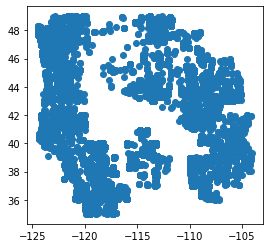

In [30]:
glas_gdf.plot();

<AxesSubplot:>

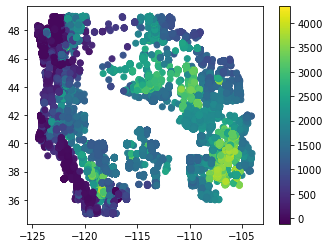

In [31]:
glas_gdf.plot(column='glas_z', legend=True)

In [32]:
glas_gdf.total_bounds

array([-124.482406,   34.999455, -104.052336,   48.999727])

In [33]:
glas_gdf.geometry

0        POINT (-105.35656 44.15790)
1        POINT (-105.35812 44.15017)
2        POINT (-105.35843 44.14863)
3        POINT (-105.35874 44.14709)
4        POINT (-105.35905 44.14554)
                    ...             
65231    POINT (-117.04440 37.89622)
65232    POINT (-117.04467 37.89777)
65233    POINT (-117.04495 37.89932)
65234    POINT (-117.04523 37.90087)
65235    POINT (-117.04551 37.90242)
Name: geometry, Length: 65236, dtype: geometry

In [73]:
#glas_gdf.explore()

## Reproject the GeoDataFrame

In [35]:
#glas_gdf.to_crs?

In [36]:
glas_gdf_proj = glas_gdf.to_crs('EPSG:3857')

In [37]:
glas_gdf_proj.head()

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc,geometry
0,2003.139571,731266.943345,44.157897,-105.356562,1398.51,1400.52,0.33,31,POINT (-11728238.834 5489909.710)
1,2003.139571,731266.943346,44.150175,-105.358116,1387.11,1384.64,0.43,31,POINT (-11728411.824 5488711.598)
2,2003.139571,731266.943347,44.148632,-105.358427,1392.83,1383.49,0.28,31,POINT (-11728446.444 5488472.212)
3,2003.139571,731266.943347,44.147087,-105.358738,1384.24,1382.85,0.84,31,POINT (-11728481.065 5488232.521)
4,2003.139571,731266.943347,44.145542,-105.359048,1369.21,1380.24,1.73,31,POINT (-11728515.574 5487992.837)


In [38]:
glas_gdf_proj.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [74]:
#glas_gdf.plot();

In [75]:
#glas_gdf_proj.plot();

## CRS and Projections
There are many excellent references out there about coordinate systems and map projections.  I'm not going to try to reproduce here.  If you're relatively new to all of this, please revisit resources in the reading assignment. Can also review:
* https://www.axismaps.com/guide/map-projections
* http://downloads2.esri.com/support/documentation/ao_/710Understanding_Map_Projections.pdf
* https://courses.washington.edu/gis250/lessons/projection/

I particularly like this poster from the USGS: https://pubs.er.usgs.gov/publication/70047422

## Coordinate Reference System (CRS)
* CRS is a "coordinate system with a datum"
* AKA Spatial Reference System (SRS): https://en.wikipedia.org/wiki/Spatial_reference_system
* Two types:
    * Geodetic (AKA Geographic)
    * Projected
* https://datacarpentry.org/organization-geospatial/03-crs/

## How to specify a CRS
Many ways!
https://geopandas.org/en/stable/docs/user_guide/projections.html

* EPSG Codes
* Proj strings
* WKT and WKT2
    * https://en.wikipedia.org/wiki/Well-known_text_representation_of_coordinate_reference_systems

In [41]:
!gdalsrsinfo EPSG:4326


PROJ.4 : +proj=longlat +datum=WGS84 +no_defs

OGC WKT2:2018 :
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["Horiz

In [42]:
!gdalsrsinfo EPSG:32610


PROJ.4 : +proj=utm +zone=10 +datum=WGS84 +units=m +no_defs

OGC WKT2:2018 :
PROJCRS["WGS 84 / UTM zone 10N",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ENSEMBLEACCURACY[2.0]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 10N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            AN

## Map Projection check in
* https://en.wikipedia.org/wiki/Map_projection
* Tradeoffs - no perfect projection, all have some distortion of distance, area, direction, shape
* Infinite number of ways to represent the Earth's 3D surface on a 2D Plane
    * Plane (azimuthal), Cone, Cylinder
    * Tangent, Secant (intersects sphere at two locations)
    * Different parameters for different definitions
        * Center longitude, center latitude
        * Lines of "true scale" 

## Proj strings

In [43]:
mycrs = glas_gdf.crs
mycrs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [44]:
mycrs.to_epsg()

4326

In [45]:
mycrs.to_proj4()
#Note warning

/srv/conda/envs/notebook/lib/python3.9/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


'+proj=longlat +datum=WGS84 +no_defs +type=crs'

In [46]:
glas_gdf_proj.crs.to_epsg()

3857

In [47]:
glas_gdf_proj.crs.to_proj4()

'+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs +type=crs'

In [48]:
proj_str = '+proj=sinu'

In [49]:
glas_gdf.to_crs(proj_str)

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc,geometry
0,2003.139571,731266.943345,44.157897,-105.356562,1398.51,1400.52,0.33,31,POINT (-8427806.282 4891366.903)
1,2003.139571,731266.943346,44.150175,-105.358116,1387.11,1384.64,0.43,31,POINT (-8429029.663 4890508.871)
2,2003.139571,731266.943347,44.148632,-105.358427,1392.83,1383.49,0.28,31,POINT (-8429274.141 4890337.420)
3,2003.139571,731266.943347,44.147087,-105.358738,1384.24,1382.85,0.84,31,POINT (-8429518.899 4890165.747)
4,2003.139571,731266.943347,44.145542,-105.359048,1369.21,1380.24,1.73,31,POINT (-8429763.572 4889994.074)
...,...,...,...,...,...,...,...,...,...
65231,2009.775995,733691.238340,37.896222,-117.044399,1556.16,1556.43,0.00,31,POINT (-10294767.886 4195979.129)
65232,2009.775995,733691.238340,37.897769,-117.044675,1556.02,1556.43,0.00,31,POINT (-10294576.705 4196150.837)
65233,2009.775995,733691.238340,37.899319,-117.044952,1556.19,1556.44,0.00,31,POINT (-10294385.184 4196322.879)
65234,2009.775995,733691.238340,37.900869,-117.045230,1556.18,1556.44,0.00,31,POINT (-10294193.744 4196494.920)


## Combining Vector Data

In [50]:
#Grab the bundled world polygons
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [51]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [52]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [53]:
world.geometry

0      MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1      POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2      POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4      MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                             ...                        
172    POLYGON ((18.82982 45.90887, 18.82984 45.90888...
173    POLYGON ((20.07070 42.58863, 19.80161 42.50009...
174    POLYGON ((20.59025 41.85541, 20.52295 42.21787...
175    POLYGON ((-61.68000 10.76000, -61.10500 10.890...
176    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry

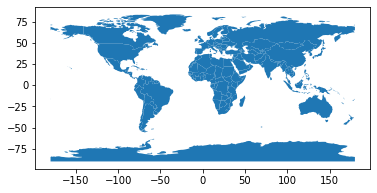

In [54]:
world.plot();

### Select a country by name

In [55]:
idx = world['name'] == 'United States of America'

In [56]:
idx

0      False
1      False
2      False
3      False
4       True
       ...  
172    False
173    False
174    False
175    False
176    False
Name: name, Length: 177, dtype: bool

In [57]:
us = world[idx]
us

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

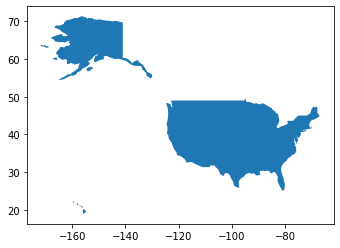

In [58]:
us.plot()

In [59]:
us.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [60]:
us.geometry

4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
Name: geometry, dtype: geometry

### Compute area

In [61]:
us.area
#Note warning!

/tmp/ipykernel_652/4249169899.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  us.area


4    1122.281921
dtype: float64

*Note: All calculations in GEOS/Shapely are simple euclidian geometry calculations in a 2D cartesian coordinate system!*



### Use an equal area projection!
* https://proj.org/operations/projections/cea.html

In [62]:
us_cea = us.to_crs('+proj=cea')
us_cea

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-13674486.249 4793613.071, -13..."


<AxesSubplot:>

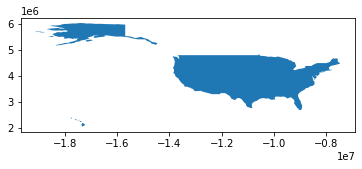

In [63]:
us_cea.plot()

In [64]:
us_cea.area

4    9.509851e+12
dtype: float64

In [65]:
us_cea.area/1E6

4    9.509851e+06
dtype: float64

<AxesSubplot:>

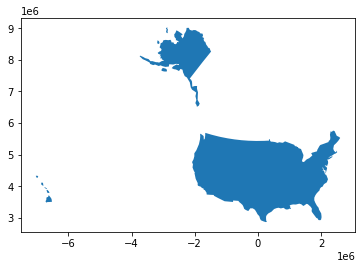

In [66]:
us_cea = us.to_crs('+proj=tmerc +lon_0=-100')
us_cea.plot()

In [77]:
#Back to Web Mercator
#us_cea.explore()

## Combining on same plot

In [68]:
#%matplotlib widget

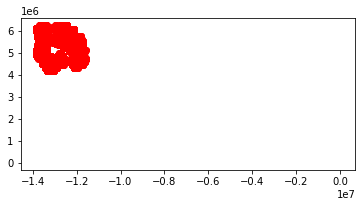

In [69]:
f, ax = plt.subplots()
us.plot(ax=ax)
glas_gdf_proj.plot(ax=ax, color='r');

#Where are the US polygons?  Let's take a look...

### Use a common projection!

In [70]:
us_proj = us.to_crs(glas_gdf_proj.crs)
us_proj

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-13674486.249 6274861.394, -13..."


In [71]:
us_proj.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

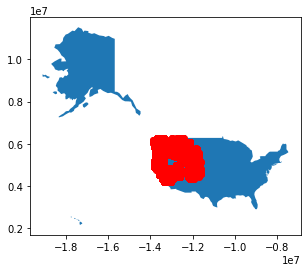

In [72]:
f, ax = plt.subplots()
us_proj.plot(ax=ax)
glas_gdf_proj.plot(ax=ax, color='r');

# Much better!